# Overview

의사결정나무(Decision tree) 또는 tree 모형은 의사결정 규칙을 tree 구조로 나타내어 전체자료를 몇 개의 소집단으로 분류(classification)하거나 예측(prediction)을 수행하는 분석방법이다.  
상위 노드에서의 (분류변수, 분류기준값)은 이 기준에 의해 분기되는 하위노드에서 노드(집단) 내에서는 동질성이 노드(집단)간에는 이질성이 가장 커지도록 선택된다.

목표변수가 이산형인 분류나무의 경우 상위노드에서 가지분할(split)을 수행할 때, 분류(기준)변수와 분류기준값의 선택 방법
- 카이제곱 통계량(Chi-square statistic)의 p-값
- 지니 지수(Gini index)
- 엔트로피 지수(entropy index) 등이 사용된다.

##### 의사결정나무의 분석과정은 다음과 같다.
- 단계1. 목표변수와 관계가 있는 설명변수들의 선택
- 단계2. 분석목적과 자료의 구조에 따라 적절한 분리기준과 정지규칙을 정하여 의사결정나무의 생성
- 단계3. 부적절한 나뭇가지는 제가: 가지치기(pruning)
- 단계4. 이익(gain), 위험(risk), 비용(codst) 등을 고려하여 모형평가
- 단계5. 분류(classification) 및 예측(prediction)

# [예제1] rpatr() 함수를 이용하여 Decision tree 분석 수행

In [1]:
library(rpart)
c <- rpart(Species ~., data=iris)
c

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

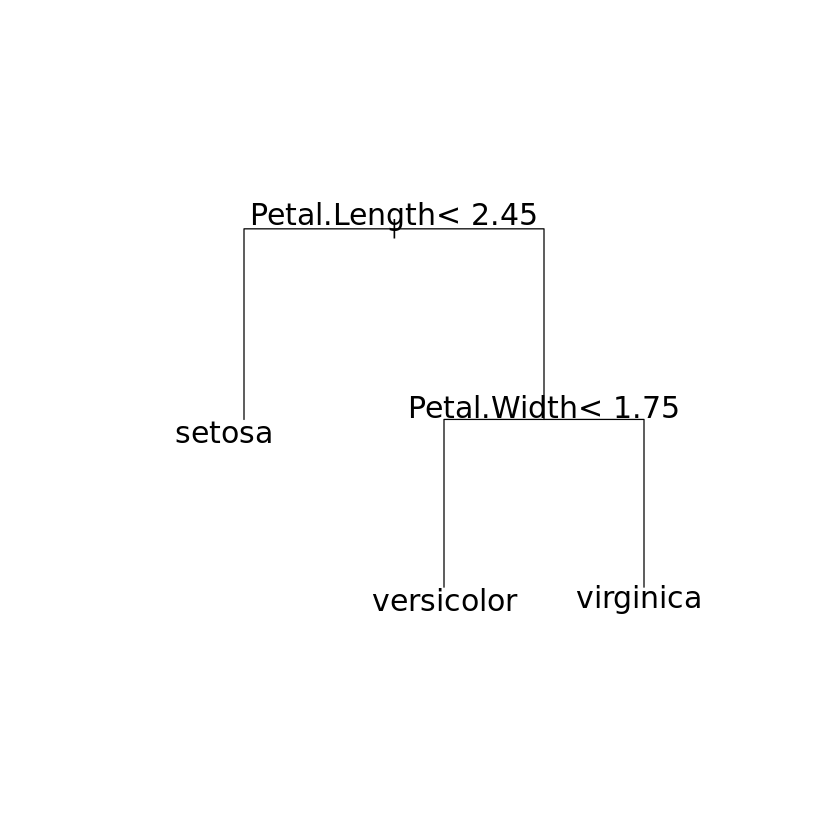

In [2]:
plot(c, compress=T, margin=0.3)
text(c, cex=1.5)

predict() 함수를 이용하여 새로운 자료에 대해 예측을 수행한다.  
여기서는 편의상 모형구축에 사용된 자료를 재대입한 결과를 제시한다.

In [4]:
head(predict(c, newdata=iris, type="class"))

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

In [5]:
tail(predict(c, newdata=iris, type="class"))

145       146       147       148       149       150 
virginica virginica virginica virginica virginica virginica 
Levels: setosa versicolor virginica

R 패키지 [rpart.plot]을 이용하여 적합된 의사결정나무 모형을 여러가지 방식으로 시각화할 수 있다.

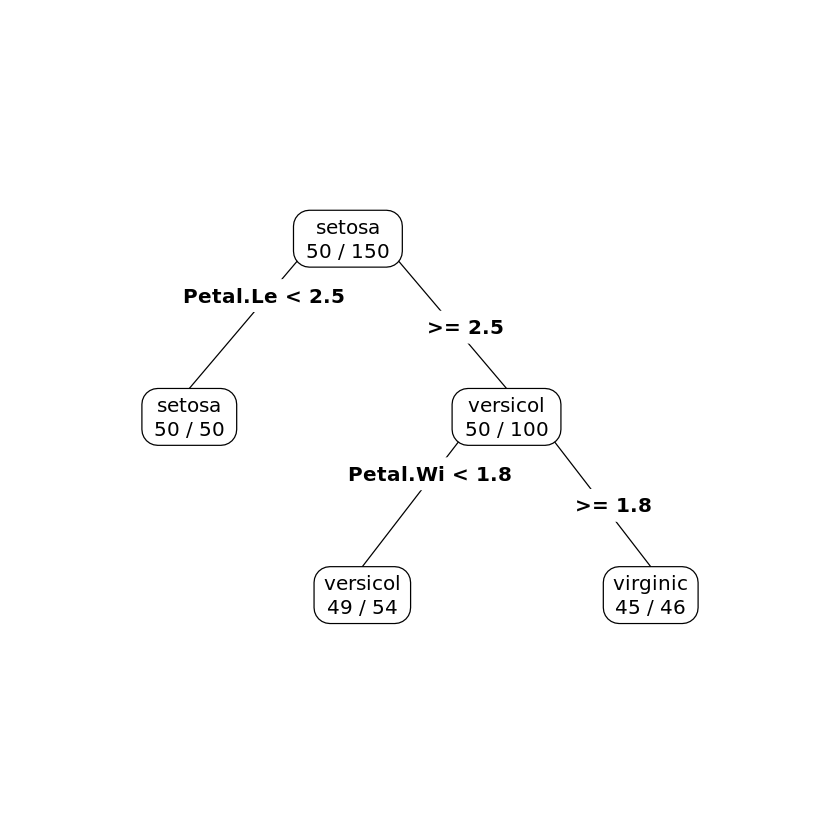

In [8]:
library(rpart.plot)
prp(c, type=4, extra=2)

최종 노드(ternimal node)에 대한 해석은 다음과 같다.  
예를 들어, 두 조건(Petal.Length)>=2.4 와 Petal.Width<1.8)을 만족하는 노드에서 49/54는 이 노드에 속하는 개체가 54개이며 이 가운데 versicolor가 49임을 나타낸다.

In [10]:
ls(c)

[1] "call"                "control"             "cptable"            
 [4] "frame"               "functions"           "method"             
 [7] "numresp"             "ordered"             "parms"              
[10] "splits"              "terms"               "variable.importance"
[13] "where"               "y"

In [11]:
c$cptable

CP,nsplit,rel error,xerror,xstd
0.50,0,1.00,1.15,0.05180090
0.44,1,0.50,0.57,0.05944746
0.01,2,0.06,0.11,0.03192700


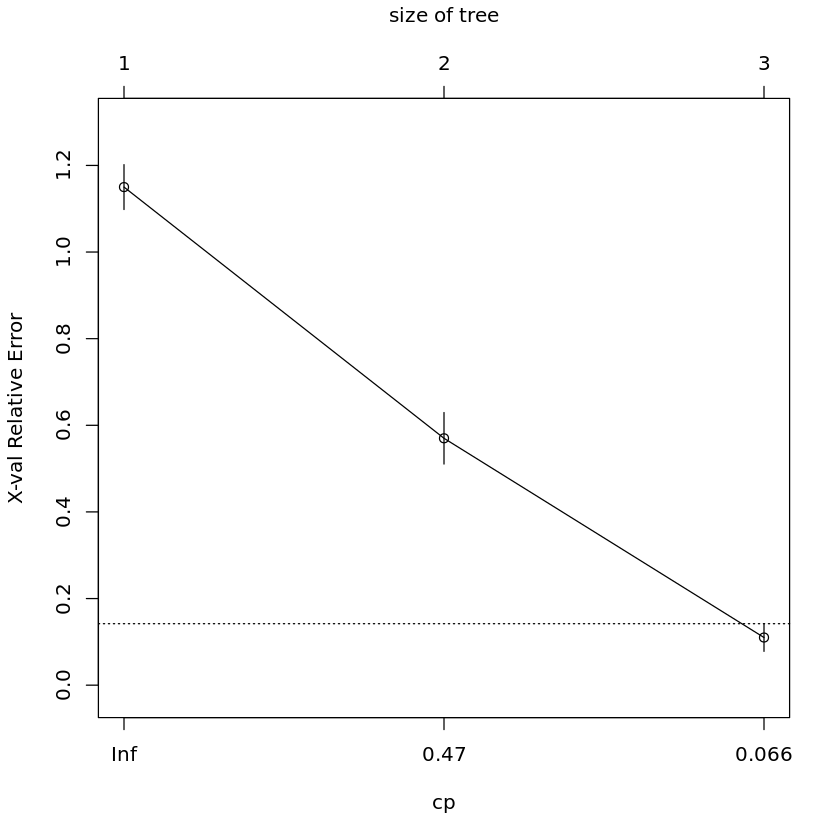

In [12]:
plotcp(c)

c$cptable은 트리의 크기에 따른 비용-복잡도 모수(cost-complexity parameter)를 제공하며,  
교차타당성오차(cross-validation error)를 함께 제공한다. 이 값들은 prune() 또는 rpart.control() 함수에서 가지치기(pruning)와 트리의 최대 크기(maximum size)를 조절하기 위한 옵션으로 사용된다.  

다음은 교차 타당성오차를 최소로 하는 트리를 형성하는 과정이다.  
여기서는 위의 rpart()를 수행한 결과와 동일한 결과를 얻게 되어 그 결과는 생략한다.

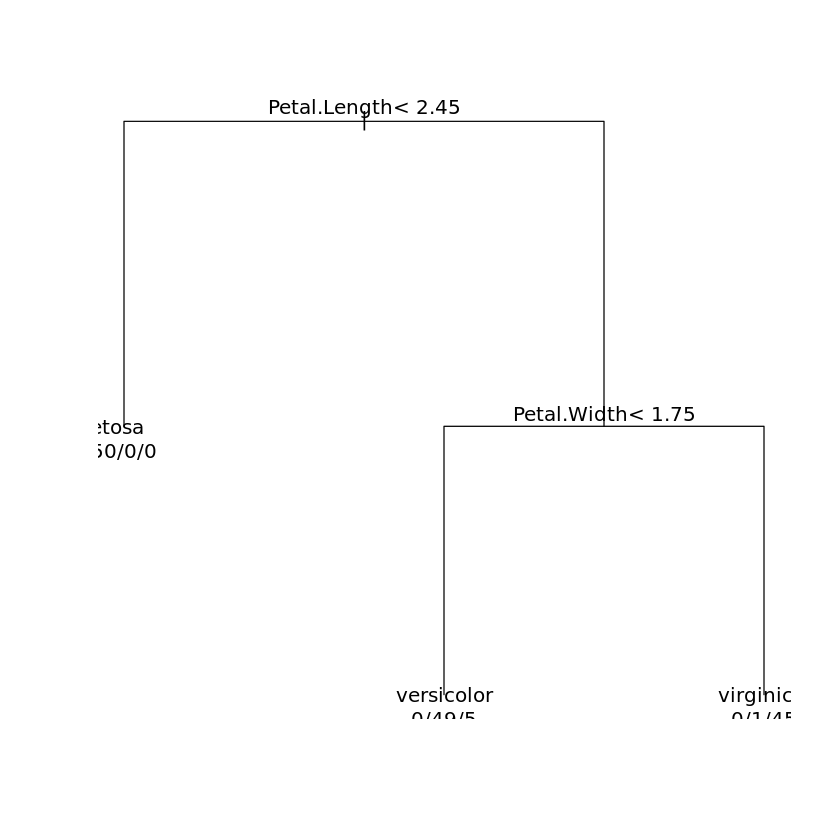

In [13]:
opt <- which.min(c$cptable[,"xerror"])
cp <- c$cptable[opt, "CP"]
prune.c <- prune(c, cp = cp)
plot(prune.c)
text(prune.c, use.n=T)

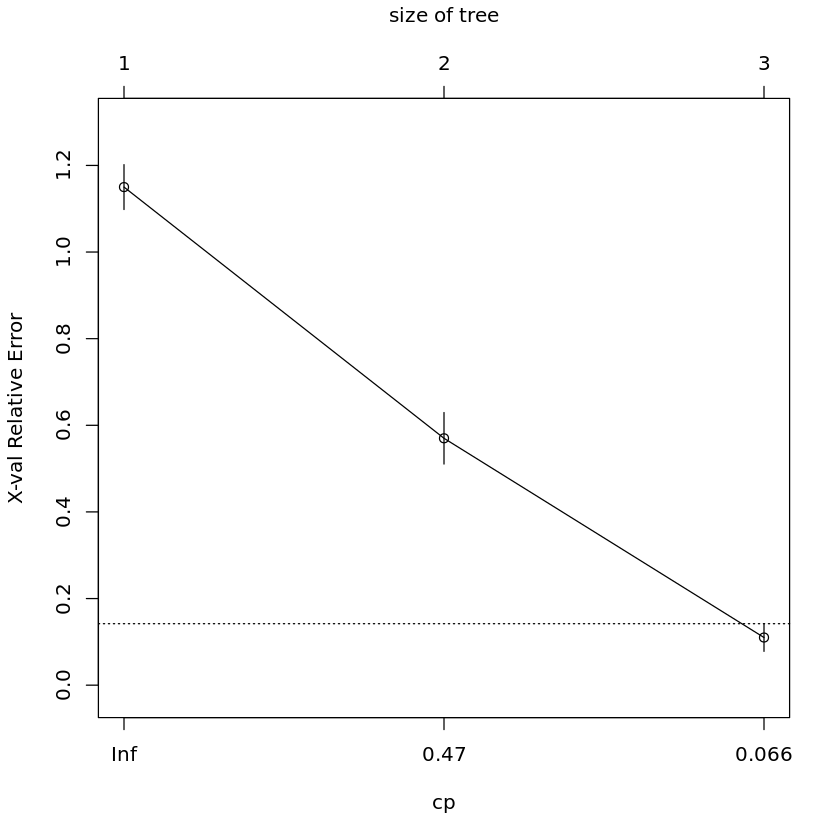

In [14]:
plotcp(c)

# [예제2] ctree() 함수를 이용하여 Decision tree 적용

분석에 사용된 자료는 146명의 전립선 암 환자의 자료(stagec)이다.  
7개의 예측변수를 이용하여 범주형의 반응변수(ploidy)를 예측(또는 분류)한다.

In [17]:
library(party)
data(stagec)  # stage는 {rpart}에서 제공함
str(stagec)

'data.frame':	146 obs. of  8 variables:
 $ pgtime : num  6.1 9.4 5.2 3.2 1.9 4.8 5.8 7.3 3.7 15.9 ...
 $ pgstat : int  0 0 1 1 1 0 0 0 1 0 ...
 $ age    : int  64 62 59 62 64 69 75 71 73 64 ...
 $ eet    : int  2 1 2 2 2 1 2 2 2 2 ...
 $ g2     : num  10.26 NA 9.99 3.57 22.56 ...
 $ grade  : int  2 3 3 2 4 3 2 3 3 3 ...
 $ gleason: int  4 8 7 4 8 7 NA 7 6 7 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 3 1 1 2 1 2 3 1 2 ...


다음은 결측값을 제거하는 과정이다.

In [18]:
stagec1 <- subset(stagec, !is.na(g2))
stagec2 <- subset(stagec1, !is.na(gleason))
stagec3 <- subset(stagec2, !is.na(eet))
str(stagec3)

'data.frame':	134 obs. of  8 variables:
 $ pgtime : num  6.1 5.2 3.2 1.9 4.8 3.7 15.9 6.3 2.9 1.5 ...
 $ pgstat : int  0 1 1 1 0 1 0 0 1 1 ...
 $ age    : int  64 59 62 64 69 73 64 65 58 70 ...
 $ eet    : int  2 2 2 2 1 2 2 2 2 2 ...
 $ g2     : num  10.26 9.99 3.57 22.56 6.14 ...
 $ grade  : int  2 3 2 4 3 3 3 3 4 3 ...
 $ gleason: int  4 7 4 8 7 6 7 7 8 8 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 1 1 2 1 1 2 2 2 1 ...


결측값이 제거된 134개의 자료를 이용하여 모형에 적용한다.  
모형구축을 위한 훈련용 자료(training data)와 모형의 성능을 검증하기 위한 검증용 자료(test data)를 70%와 30%로 구성한다.

In [19]:
set.seed(1234)
ind <- sample(2, nrow(stagec3), replace=TRUE, prob=c(0.7, 0.3))

모형을 만들기 전에 stagec 자료를 복원 추출 방법을 이용하여 두 개의 부분집합 training(70%)과 test(30%)로 만들고, 결과의 재현성을 위해 random seed를 고정하였다.

In [20]:
ind

[1] 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1
 [38] 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2
 [75] 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
[112] 1 2 1 1 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1

In [21]:
trainData <- stagec3[ind==1,]  #n=102개
testData <- stagec3[ind==2,]  #n=32개

훈련용 자료(n = 102)에 대해 ctree()를 적용한 결과는 다음과 같다.


	 Conditional inference tree with 3 terminal nodes

Response:  ploidy 
Inputs:  pgtime, pgstat, age, eet, g2, grade, gleason 
Number of observations:  102 

1) g2 <= 13.01; criterion = 1, statistic = 49.684
  2) pgstat <= 0; criterion = 0.958, statistic = 7.5
    3)*  weights = 36 
  2) pgstat > 0
    4)*  weights = 15 
1) g2 > 13.01
  5)*  weights = 51 

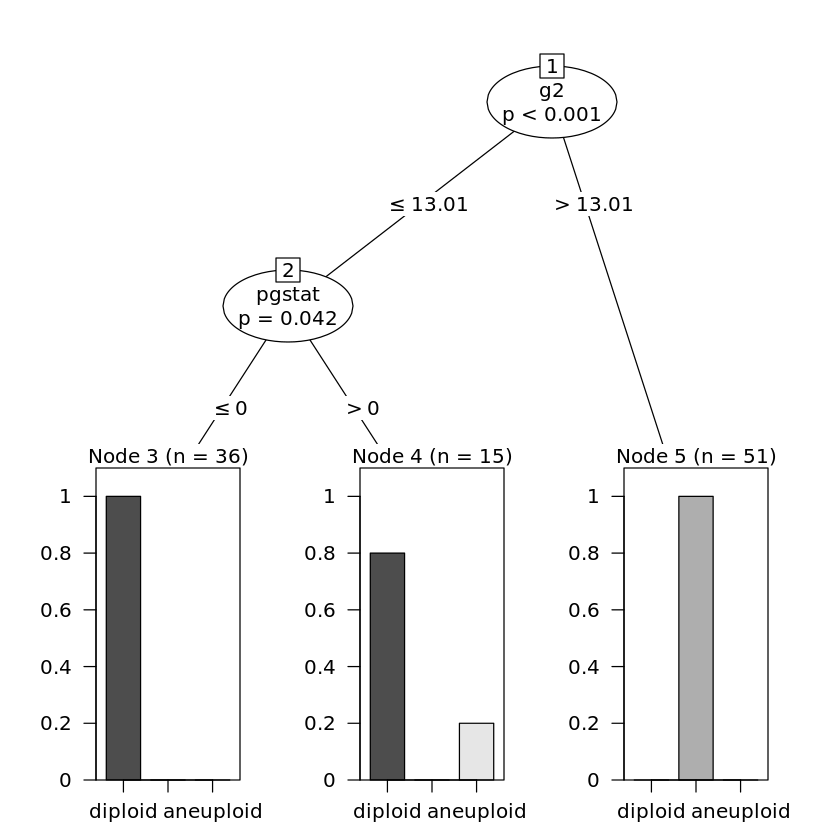

In [22]:
tree <- ctree(ploidy ~ ., data=trainData)
tree
plot(tree)

최종노드의 막대그래프(barplot)는 반응변수(ploidy)의 각 범주별 비율을 나타낸다.

predict() 함수를 통해 검증용 자료에 대해 적합모형을 적용하면 다음과 같다.

In [24]:
testPred = predict(tree, newdata=testData)
table(testPred, testData$ploidy)

            
testPred     diploid tetraploid aneuploid
  diploid         17          0         1
  tetraploid       0         13         1
  aneuploid        0          0         0

# [예제3] ctree() 함수를 이용하여 반응변수가 연속현인 경우 의사결정나무를 통한 예측을 수행한다.

airquality 자료에 대해 의사결정나무모형을 적합한다.  
먼저 반응변수 Ozone이 결측인 자료를 제외한 후 ctree() 함수를 적용한다.

In [25]:
airq <- subset(airquality, !is.na(Ozone))
head(airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7


In [26]:
airct <- ctree(Ozone ~ ., data=airq)
airct


	 Conditional inference tree with 5 terminal nodes

Response:  Ozone 
Inputs:  Solar.R, Wind, Temp, Month, Day 
Number of observations:  116 

1) Temp <= 82; criterion = 1, statistic = 56.086
  2) Wind <= 6.9; criterion = 0.998, statistic = 12.969
    3)*  weights = 10 
  2) Wind > 6.9
    4) Temp <= 77; criterion = 0.997, statistic = 11.599
      5)*  weights = 48 
    4) Temp > 77
      6)*  weights = 21 
1) Temp > 82
  7) Wind <= 10.3; criterion = 0.997, statistic = 11.712
    8)*  weights = 30 
  7) Wind > 10.3
    9)*  weights = 7 

최종마디(*로 표시된 마디)가 5개인 트리모형을 나타낸다. 이를 시각화하면 다음과 같다.

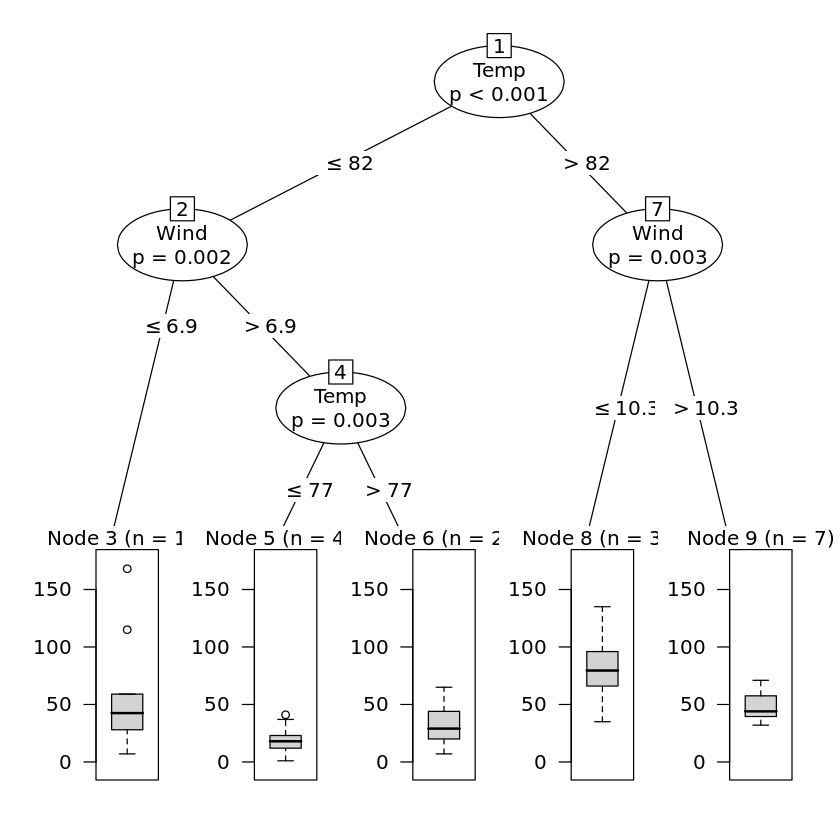

In [27]:
plot(airct)

위 모형으로부터 새로운 자료에 대한 예측은 predict() 함수를 이용한다.  
연속형 반응변수에 대한 예측값은 최종 마디에 속한 자료들의 평균값이 제공된다.  
분석에 사용된 자료를 재대입한 결과는 다음과 같다.

In [29]:
head(predict(airct, data=airq))

Ozone
18.47917
18.47917
18.47917
18.47917
18.47917
18.47917


자료가 속하는 해당 최종마디의 번호를 출력하고 싶을 때는 type="node" 옵션을 사용한다.

In [30]:
predict(airct, data=airq, type="node")   # > where(airct)의 결과와 동일

[1] 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 3 5 6 9 9 6 5 5 5 5 5 8 8
 [38] 6 8 9 8 8 8 8 5 6 6 3 6 8 8 9 3 8 8 6 9 8 8 8 6 3 6 6 8 8 8 8 8 8 9 6 6 5
 [75] 3 5 6 6 5 5 6 3 8 8 8 8 8 8 8 8 8 8 9 6 6 5 5 6 5 3 5 5 3 5 5 5 6 5 5 6 5
[112] 5 3 5 5 5

예측값을 이용하여 평균제곱오차를 구하면 다음과 같다.

In [31]:
mean(airq$Ozone - predict(airct)^2)

[1] -2407.902

# 의사결정나무모형의 장단점

##### 장점
- 그 구조가 단순하여 해석이 용이하고,
- 유용한 입력변수의 파악과 예측변수간의 상호작용 및 비선형성을 고려하여 분석이 수행되며,
- 선형성, 정규성, 등분산성 등의 수학적 가정이 불필요한 비모수적 모형이다.

##### 단점
- 분류기준값의 경계선 근방의 자료값에 대해서는 오차가 클 수 있으며(비연속성),  
- 로지스틱회귀와 같이 각 예측변수의 효과를 파악하기 어려우며,
- 새로운 자료에 대한 예측이 불안정할 수 있다.